# Assignment-2: Numpy and Pandas

Hope you enjoyed the last assignment on Python and learnt something new! This one is on **Numpy** and **Pandas**. 

<h1 style="color:purple;"> Need for Numpy </h1>

I hope you have used lists in Python. I am also assuming you are familiar with arrays in C.
### What is the main difference between lists in Python and arrays in C/C++?
Well the very first difference is in their declaration:
1. Python
```Python
lst = list()
#OR
lst = []
```
2. C/C++
```C
int arr[10];
```
As evident above, in the case of C/C++, you **must** specify the type you wish to store in the array!
<br>But in case of python lists, you don't need to! Infact you can even store different types of elements in the same list. For Example:

In [2]:
lst = [2, 'string', 2.5, [1,2,3]]
for element in lst:
    print(element,type(element),sep=' : ')

2 : <class 'int'>
string : <class 'str'>
2.5 : <class 'float'>
[1, 2, 3] : <class 'list'>


So in the above example you just stored 4 different types of elements in the same list. You can't do that with plain C arrays. You must specify the type of array beforehand. 
<br> This brings us to one of the main features of Python, **it is a dynamically typed language**, meaning the language infers the type of the variable dynamically, without your intervention! Why? It is one of the design principles of python, run the cell below to see the main principles on which Python is built!

In [3]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


**So while dynamic-typing, makes working in Python a whole lot simple and straightforward, there is a trade-off in everything.**
### Can you guess what is the downside here?
 Well, the way you operate on two data-types is different for each type!
 For example, consider the two pieces of code below:
<br>1.
```Python
a = 5
b = 6
c = a+b
```
2.
```Python
a = 'hello'
b = 'world'
c = a+b
```


As evident the way you would add 'a' and 'b' when they are integers is different from when they are strings.
So if knew their types, you could add them directly, but because the types are dynamic, Python has to go and look for their types before it can do any operation on them. **Also in order to implement dynamic-typing you also have to store a lot of other information about the variable** which you have look up, before doing any kind of operation on it!


<br> Now imagine you have two arrays of 100,000 numbers each and you want to add them element-wise. This would would require 100,000 of those redundant lookups even if you, as a programmer, know they are all integers. <br>**This makes list operations in Python slow. How slow? See it in action in the following cells!**

$\color{maroon}{\text{*First check your Numpy installation by running the cell below!}}$


In [1]:
try:
    import numpy as np
except:
    print("You don't have Numpy installed. Please install it first!")

Here we will use something called: ```%timeit```, which is a feature of IPython. We use it to get the average running time of a single line of code.

In [2]:
# A function to add two python lists:
def add_lists(l1,l2):
    return [e1+e2 for e1,e2 in zip(l1,l2)]

In [3]:
# We create two large lists to check the time taken to add them in plain naive Python
l1 = [1]*1000000
l2 = [2]*1000000
%timeit -o add_lists(l1,l2)


91 ms ± 10.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 91 ms ± 10.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [7]:
naivePythontime = _

Result is diplayed in format: $\text{Mean}\pm\text{Standard Deviation}$

In [8]:
# Now we do the same thing in Numpy. 
# First we convert both lists to numpy arrays
numpyArray1 = np.array(l1)
numpyArray2 = np.array(l2)
# In Numpy, we can add two arrays directly with just a '+' sign. Inbuilt functionality!
%timeit -o numpyArray1+numpyArray2

3.1 ms ± 48 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 3.1 ms ± 48 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [9]:
numpytime = _

In [10]:
reduction = (1-(numpytime.average/naivePythontime.average))*100

In [11]:
print('Crazy! A reduction of around {:.2f}% with lesser standard deviation too!'.format(reduction))

Crazy! A reduction of around 94.41% with lesser standard deviation too!


<code style="background:blue;color:white"><strong>For more information on this topic, it is highly recommended that you go through:</strong></code> 
<br><strong>[Python Data Science Handbook: Section on Numpy](https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html)</strong>

### Here is something Additional left for your observation




In [12]:
list2 = [4, 5, 6]*10**6
list1 = [1, 2, 3]*10**6
%timeit from operator import add;map(add, list1, list2)
%timeit [a + b for a, b in zip(list1, list2)]
%timeit [sum(x) for x in zip(list1, list2)]

1.34 µs ± 70.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
160 ms ± 6.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
431 ms ± 12 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Numpy exercises:
<code style="background:red;color:white"><strong>Make sure to use, the in-built Numpy functions to solve the exercises below!</strong></code> 
<br> That means say goodbye to your old-friend: loops

## 1. Standardization & Normalization
<br> Feature-scaling is a technique in Machine Learning used to ensure that no variable is dominated by another variable just because of differences in the units. Standardization and Normalization are the two main types of feature-scaling using in machine learning.

### Q1. Standardize the data given below. 
<br>It means making sure that the data has a mean of 0 and standard deviation of 1.
<br>Mathematically, it is equivalent to:
<center><h2>$\widehat{x}_{i} \leftarrow \frac{x_{i}-\mu}{\sigma}\\$ </h2></center>
<br> That is subtracting the mean and dividing by the standard deviation

In [4]:
# Generate a random vector of size 1000 consisting of integers
x = np.random.randint(100,2000,size=1000)

In [5]:
def standardize(x):
    # Your code here
    x= (x-x.mean())/x.std()
    return x

Check your code here:

In [6]:
standard_x = standardize(x)
print(np.isclose(standard_x.mean(),0)) #SHOULD RETURN TRUE
print(np.isclose(standard_x.std(),1))  #SHOULD RETURN TRUE

True
True


Notice that inorder to check your answer, we use ```np.isclose()``` instead of directly using ```==``` operator. This is because incase of float values you might not always get exactly 0 and 1 each time. There will be very minor deviations which can be checked with ```isclose()```. To find out more check out the exact values of mean and std of ```standard_x```

### Q2. Similarly normalize the data given below
We will do something called the min-max normalization:
<center><h2>$\forall x_{i}\in x:\hspace{1em}x_{i}^{\prime}=\frac{x_{i}-\min (x)}{\max (x)-\min (x)}$</h2></center>

In [16]:
# Generate a random vector of size 1000 consisting of integers
x = np.random.randint(100,2000,size=1000)

In [7]:
def minmax_normalization(x):
    #Your code here
    x=(x-x.min())/(x.max()-x.min())
    return x

Check your code here:

In [8]:
normalized_x = minmax_normalization(x)
x_range = max(x) - min(x)
all([e*x_range + min(x) == x[i] for i,e in enumerate(normalized_x)]) #SHOULD RETURN TRUE

True

## Next you have some tasks on tabular data

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle 
import pandas as pd

In [10]:
sample_array = [[[0.39701242, 0.64795493, 0.82015523, 0.47714397],
        [0.61050851, 0.09212451, 0.95963256, 0.41985557],
        [0.27391591, 0.33722757, 0.37711697, 0.25088287]],

       [[0.18765004, 0.50870891, 0.84608397, 0.42461235],
        [0.56763472, 0.33337372, 0.15827817, 0.25144675],
        [0.87757418, 0.77667833, 0.12968176, 0.57340563]],

       [[0.30829242, 0.17566506, 0.19051968, 0.0292753 ],
        [0.78466745, 0.11723487, 0.13013034, 0.81816275],
        [0.19548689, 0.5087261 , 0.24062887, 0.5802945 ]],

       [[0.9852273 , 0.75824102, 0.74657911, 0.61079072],
        [0.76900216, 0.2018701 , 0.1451892 , 0.70931268],
        [0.09819222, 0.17590433, 0.39662458, 0.51550013]],

       [[0.10138029, 0.0672748 , 0.94312381, 0.02260723],
        [0.73505001, 0.29274562, 0.32332605, 0.94109355],
        [0.56832888, 0.8200373 , 0.45544326, 0.31762768]],

       [[0.68691108, 0.80642892, 0.44636894, 0.36571316],
        [0.6398124 , 0.45857279, 0.47091858, 0.59696148],
        [0.67141986, 0.47450649, 0.8240861 , 0.05446835]],

       [[0.35766232, 0.22966313, 0.38577663, 0.01015032],
        [0.90221503, 0.35798473, 0.200057  , 0.37924078],
        [0.64835199, 0.11539047, 0.42224305, 0.40706566]],

       [[0.11027789, 0.4880045 , 0.30515654, 0.50183265],
        [0.174235  , 0.09235368, 0.08240456, 0.68501375],
        [0.03881442, 0.68751467, 0.39280243, 0.49397476]],

       [[0.28304702, 0.5611749 , 0.3518497 , 0.14118579],
        [0.27919497, 0.69063948, 0.46464225, 0.65073605],
        [0.35729135, 0.01133827, 0.19849849, 0.32775059]],

       [[0.28647882, 0.0653557 , 0.47752158, 0.65219843],
        [0.34500368, 0.24179076, 0.52238864, 0.53393046],
        [0.75470537, 0.89673909, 0.28215004, 0.79146273]]]

## Task-1

### Convert the list to numpy arrays

In [11]:
#here
sample_array = np.array(sample_array)

## Task-2

### Find the shape of the array

In [12]:
#here
sample_array.shape

(10, 3, 4)

## Task-3

### Create a random array called my_array with the same shape as sample_array

In [13]:
#here
my_array = np.random.random((sample_array.shape))

## Task-4

### Normalize my_array

In [14]:
#here
my_array=(my_array-my_array.min())/(my_array.max()-my_array.min())

task 5

flatten out sample_array and store it in A

flatten out my_array and store it in B


In [15]:
#here
A = sample_array.flatten()
B = my_array.flatten()

Find the solution to the equation 

`A X =  B`

find x

In [27]:
#here
X = B/A

#### Interesting task 1 XD
### Here is a np.array which has to rows representing experience of a person and another his salary

In [16]:
dataset = [[1.10000e+00, 1.30000e+00, 1.50000e+00, 2.00000e+00, 2.20000e+00,
        2.90000e+00, 3.00000e+00, 3.20000e+00, 3.20000e+00, 3.70000e+00,
        3.90000e+00, 4.00000e+00, 4.00000e+00, 4.10000e+00, 4.50000e+00,
        4.90000e+00, 5.10000e+00, 5.30000e+00, 5.90000e+00, 6.00000e+00,
        6.80000e+00, 7.10000e+00, 7.90000e+00, 8.20000e+00, 8.70000e+00,
        9.00000e+00, 9.50000e+00, 9.60000e+00, 1.03000e+01, 1.05000e+01],
       [3.93430e+04, 4.62050e+04, 3.77310e+04, 4.35250e+04, 3.98910e+04,
        5.66420e+04, 6.01500e+04, 5.44450e+04, 6.44450e+04, 5.71890e+04,
        6.32180e+04, 5.57940e+04, 5.69570e+04, 5.70810e+04, 6.11110e+04,
        6.79380e+04, 6.60290e+04, 8.30880e+04, 8.13630e+04, 9.39400e+04,
        9.17380e+04, 9.82730e+04, 1.01302e+05, 1.13812e+05, 1.09431e+05,
        1.05582e+05, 1.16969e+05, 1.12635e+05, 1.22391e+05, 1.21872e+05]]

In [17]:
### here is a small visualistion
pd.read_csv("Salary_Data.csv")

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


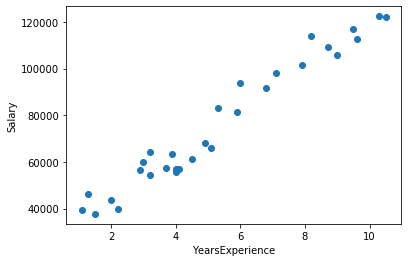

In [18]:
plt.scatter(dataset[0],dataset[1])
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

### we will be trying to fit  a line through this dataset that goes somewhere middle of these points
<p>After the assignment it would look a lot like this<br/>
As a Heads Up!! we will be doing a lot of this later XD</p>
<img src = "download.png>

<img src = download.png>

### To get you started you need two things for a line 

 <strong>A slope and an intercept we refer as b1 & b0. If you think Algebra (not MA-111) is just your thing go ahead here is a heads up<br/></strong>
 
<code>B1 = sum((x(i) - mean(x)) * (y(i) - mean(y))) / sum( (x(i) - mean(x))^2 )
B0 = mean(y) - B1 * mean(x)</code>

you know X and Y don't you?

#### if it's daunting for you, follow along and solve this in some simple steps

## Make functions to calculate mean and variance of a np.array

In [19]:
def mean(arr):
    return np.sum(arr)/arr.size

In [20]:
def variance(arr):
    return np.sum((arr-mean(arr))**2)/arr.size

# A new thing probably is covariance

### It is defined as 

<strong> <p  style="color:green;font-size:40px;"> $cov_{x,y}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}$.</p><strong/>
    <br/><br/>
    
# Make a function to find the covariance 
### probably don't use np.cov


In [21]:
def covariance(x,mean_x,y,mean_y):
    x_arr = x-mean_x
    y_arr = y-mean_y
    return np.sum(x_arr*y_arr)/(x.size-1)

### All that we need is set

Now calculate:

`
b1 = covariance(x, y) / variance(x)
b0 = mean(y) - b1 * mean(x)`

#### <p>You know what's X and Y dont you XD</p>

In [22]:
x=np.array(dataset[0])
y=np.array(dataset[1])
def calculateb1():
    return covariance(x,x.mean(),y,y.mean())/variance(x)
def calculateb0():
    return y.mean() - calculateb1()*(x.mean())

## I'll help you plot your work

### Just make sure you have b0 and b1 perfectly

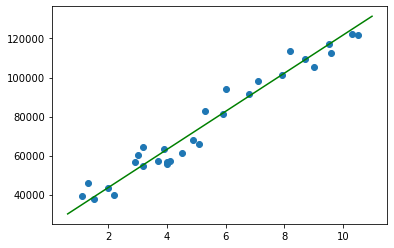

In [23]:
def abline(slope, intercept):
    plt.scatter(dataset[0],dataset[1])
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals,color = "green")

b0 = calculateb0()
b1 = calculateb1()
abline(b1,b0)

## Why don't we do some predictions on this? 
<h4>This means that for people for which we only know the years of experience,  
can we approximately calculate their expected salary..</h4>


#### Given an array of experiences [x_test] find out their salary

### Define a function called predictor which will return b1*x[i] +b0 (Say No to for loops )
#### p.s. you may have to play a liitle with type of b0 and b1

In [24]:
x_test = [[2.00],
       [6.17],
       [3.48],
       [1.80],
       [9.23],
       [5.94]]

x_test = np.array(x_test)
x_test = x_test.flatten()
def predictor(x_test,b0,b1):
    return x_test*b1 +b0
#print(x_test, predictor(x_test,b0,b1))


[2.   6.17 3.48 1.8  9.23 5.94] [ 43612.43949129  84377.62178143  58080.65766621  41657.27487306
 114291.64044038  82129.18247046]


## Next we have some image processing tasks
We can display an image using Matplotlib
<br> Here is an image of Assi Ghat :'(

In [25]:
from PIL import Image
img = Image.open('assi_ghat.jpg',)
img_arr = np.array(img,dtype=float)
# Originally the pixel values are in the range [0,255], we rescale it to [0,1] because plt expects it that way
img_arr/=255 
print(img_arr.shape)

(285, 420, 3)


Ah so it is just a 3 dimensional array. We can work with that right!

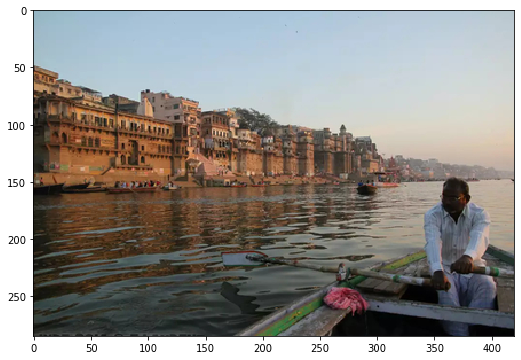

In [26]:
plt.figure(figsize=(10,6))
plt.imshow(img_arr)
plt.show()

An image is just an array of pixels. Here each pixel has a different RGB value which denotes the intensity of Red, Green, Blue in that pixel.
<br> **Looking at it this way you can understand the shape of array in the above cell : (285,420,3)**
<br> This means that the image consists of 285x420 pixels and each pixel has 3 different channels namely RGB.
<br><code style="background:blue;color:white"><strong>For more information on this topic,you can go through:</strong></code> 
<br><strong>[Section on digital images](https://automatetheboringstuff.com/chapter17/)</strong>

Now if you understand that, lets do some changes to this image and see the results!

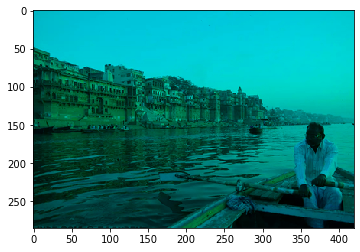

In [27]:
# This makes the RED channel of the image all 0, you can see the results
img_copy = img_arr.copy()
img_copy[:,:,0]*=0
plt.imshow(img_copy)
plt.show()

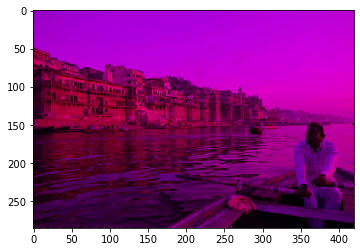

In [28]:
# This makes the GREEN channel of the image all 0, you can see the results
img_copy = img_arr.copy()
img_copy[:,:,1]*=0
plt.imshow(img_copy)
plt.show()

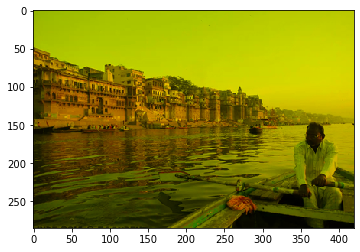

In [29]:
# This makes the BLUE channel of the image all 0, you can see the results
img_copy = img_arr.copy()
img_copy[:,:,2]*=0
plt.imshow(img_copy)
plt.show()

Now lets get to the task:
## Image Task-1 : Blur this image
Here you will blur this image and understand roughly how the image filters work on a basic level.
<br> In order to blur, you will pass a $3\times3$ filter throughout the image, and set the value of all those 9 pixels as the average of the whole $3\times3$ block
<br> [You will notice that image dimensions are multiples of 3 to make this easier for you] 
<br> **Note: You need to do this individually for all 3 channels**


For example: If the image is $6\times6$ with only 1 channel, the filter will operate as follows
<img src = example.png>
and so on.. 
<br> Next the filter will move down and replace all the numbers with its average for all $3\times3$ blocks.
<br> You can see how this will have a kind of blurring effect on the image
<br> **You must only use for loops to move the filter around, and not for changing the values or calculating the mean.**
<br> <code style="background:red;color:white"><strong>Doing this with 3 nested for loops is fairly easy, try doing it with only 2 loops for a bonus challenge. <br> You will need something called broadcasting</strong></code> 
<br><code style="background:blue;color:white"><strong>Broadcasting is a pretty important topic, it is highly recommended that you go through:</strong></code> 
<br><strong>[Python Data Science Handbook: Section on Broadcasting](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html)</strong>

In [30]:
def blur_image(img_arr):
    blurred_img = img_arr.copy()
    cnt=0
    for i in range(3):
        for j in range(img_arr.shape[0]-2):
            for k in range(img_arr.shape[1]-2):
                sub_arr=blurred_img[j:j+3,k:k+3,i].copy()
                blurred_img[j:j+3,k:k+3,i]=sub_arr.mean()
    return blurred_img

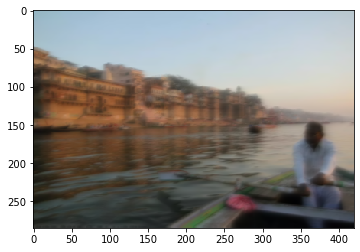

In [31]:
plt.imshow(blur_image(img_arr))
plt.show()


## Image-Task - 2 : Sobel Operator
This is a slightly harder task, in which you have to read and find out about the sobel convolutional operator <br> used heavily for edge detection in Image Processing, and implement it using Numpy
<br> Some useful links:
1. [Wikipedia Sobel-Feldman Operator](https://en.wikipedia.org/wiki/Sobel_operator)
2. [Intro to convolutional operators](https://homepages.inf.ed.ac.uk/rbf/HIPR2/convolve.htm)
<br> If the task seems daunting, try to break it into sub-task and complete. Look at the solution only after trying yourself for enough time.
<br> Feel free to google and find out more about this operator, and take your time. Edge detection in a pretty important task in Computer Vision

In [32]:
def sobel_operator(img_arr):
    '''
    Function to implement the sobel operator on a grayscale/black-and-white image
    This means it will have only 1 channels unlike RGB
    '''
    # NOTE: The size of the image will shrink slightly as it does when using conv operators without padding
    new_img = np.zeros((img_arr.shape[0]-2,img_arr.shape[1]-2)) #array to hold the ans, initialised to zero
    sobel_ver=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    sobel_hor=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    for i in range(img_arr.shape[0]-2):
        for j in range(img_arr.shape[1]-2):
            new_img[i:i+3,j:j+3]=abs(np.sum(img_arr[i:i+3,j:j+3]*sobel_ver))+abs(np.sum(img_arr[i:i+3,j:j+3]*sobel_hor))
    # your code here 
    return new_img

Please install OpenCV if not already installed:
1. [Windows Installation](https://www.geeksforgeeks.org/how-to-install-opencv-for-python-in-windows/)
2. If you use Linux we assume you would already be familiar with package installation using PIP

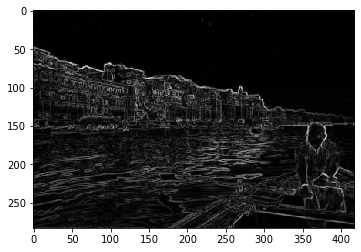

In [33]:
# WE use Open-CV (CV2) library to convert the color image into a grayscale so the sobel operator can be used
import cv2
gray_img = cv2.cvtColor(np.float32(img_arr), cv2.COLOR_BGR2GRAY)
new_img = sobel_operator(gray_img)
plt.imshow(new_img,cmap='gray')
plt.show()



<details>
    <summary><h4 style="color:green">Try yourself first! [Click here] to see solution!</h4></summary>
<p>

Here is my solution. If it has any shortcomings please report it in your PR and we'll merge

```python
def sobel_operator_solution(img_arr):
    gx_new_img = np.zeros((img_arr.shape[0]-2,img_arr.shape[1]-2))
    gy_new_img = np.zeros((img_arr.shape[0]-2,img_arr.shape[1]-2))
    vfilter3x3 = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
    hfilter3x3 = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    for i in range(img_arr.shape[0]-2):
        for j in range(img_arr.shape[1]-2):
            gx_new_img[i,j]=(img_arr[i:i+3,j:j+3]*hfilter3x3).sum()
            gy_new_img[i,j]=(img_arr[i:i+3,j:j+3]*vfilter3x3).sum()
    new_img = np.sqrt(np.minimum(gx_new_img**2 + gy_new_img**2,1))
    return new_img
```
This can be built using only the two links mentioned above and knowing nothing beforehand.
</p>
</details>  


# Basic tasks on Pandas
### Refer Assignment-3 for more Pandas tasks!

You'll be using pandas for the tasks given below(**you can use the cheat sheat provided xD**)

### Start with creating a new pandas dataframe using pandas.DataFrame and store it in 'regular'


In [34]:
regular = pd.DataFrame()

### Make an array of the size of that of "Salary_Data" using numpy.random with values between 0 and 1 
Then store these values in 'regular'

In [35]:
new_arr = np.random.random((30,))
regular=pd.DataFrame(new_arr)
regular=regular.rename(columns={0:'Column',})
print(regular)

      Column
0   0.744167
1   0.126762
2   0.217271
3   0.760728
4   0.237697
5   0.709843
6   0.634424
7   0.575661
8   0.674629
9   0.267545
10  0.269513
11  0.779285
12  0.190763
13  0.488109
14  0.039212
15  0.774874
16  0.885942
17  0.758191
18  0.218767
19  0.898690
20  0.987939
21  0.771865
22  0.112707
23  0.392584
24  0.036075
25  0.252658
26  0.266318
27  0.456205
28  0.598839
29  0.265880


### Do the following changes:
```
for value in the regular:
   if 0 <= value < 0.4:
        make it NO
    if 0.4 < value < 0.6:
        make it NA
    else:
        make it YES
```

In [36]:
def change_values(value):
    if 0<=value<0.4:
        return 'NO'
    elif 0.4<value<0.6:
        return 'NA'
    else:
        return 'YES'
regular['Column']=regular['Column'].apply(change_values)
print(regular)

   Column
0     YES
1      NO
2      NO
3     YES
4      NO
5     YES
6     YES
7      NA
8     YES
9      NO
10     NO
11    YES
12     NO
13     NA
14     NO
15    YES
16    YES
17    YES
18     NO
19    YES
20    YES
21    YES
22     NO
23     NO
24     NO
25     NO
26     NO
27     NA
28     NA
29     NO


###  Concatenate this column to "Salary_Data" 

In [37]:
Salary_Data = pd.read_csv("Salary_Data.csv")
Salary_Data['Column']=regular['Column']
#print(Salary_Data)

    YearsExperience    Salary Column
0               1.1   39343.0    YES
1               1.3   46205.0     NO
2               1.5   37731.0     NO
3               2.0   43525.0    YES
4               2.2   39891.0     NO
5               2.9   56642.0    YES
6               3.0   60150.0    YES
7               3.2   54445.0     NA
8               3.2   64445.0    YES
9               3.7   57189.0     NO
10              3.9   63218.0     NO
11              4.0   55794.0    YES
12              4.0   56957.0     NO
13              4.1   57081.0     NA
14              4.5   61111.0     NO
15              4.9   67938.0    YES
16              5.1   66029.0    YES
17              5.3   83088.0    YES
18              5.9   81363.0     NO
19              6.0   93940.0    YES
20              6.8   91738.0    YES
21              7.1   98273.0    YES
22              7.9  101302.0     NO
23              8.2  113812.0     NO
24              8.7  109431.0     NO
25              9.0  105582.0     NO
2

### Calculate mean and variance for salary in "Salary_Data"

In [38]:
mean_s=Salary_Data['Salary'].mean()
var_s=Salary_Data['Salary'].var()
print(mean_s,var_s)

76003.0 751550960.4137931


### Introduce a new column with the formula '(salary - mean)/variance'

In [39]:
Salary_Data['formula'] = (Salary_Data['Salary']-mean_s)/var_s

### Drop the rows with NA or null data using .dropna()

In [40]:
Salary_Data.dropna()

,YearsExperience,Salary,Column,formula
0,1.1,39343.0,YES,-0.000049
1,1.3,46205.0,NO,-0.000040
2,1.5,37731.0,NO,-0.000051
3,2.0,43525.0,YES,-0.000043
4,2.2,39891.0,NO,-0.000048
5,2.9,56642.0,YES,-0.000026
6,3.0,60150.0,YES,-0.000021
7,3.2,54445.0,NA,-0.000029
8,3.2,64445.0,YES,-0.000015
9,3.7,57189.0,NO,-0.000025


### Randomly select 2 rows of "Salary_Data" and make "YearsExperience" null of both of them

In [41]:
Salary_Data.at[2,'YearsExperience']=np.nan
Salary_Data.at[4,'YearsExperience']=np.nan
print(Salary_Data)

    YearsExperience    Salary Column   formula
0               1.1   39343.0    YES -0.000049
1               1.3   46205.0     NO -0.000040
2               NaN   37731.0     NO -0.000051
3               2.0   43525.0    YES -0.000043
4               NaN   39891.0     NO -0.000048
5               2.9   56642.0    YES -0.000026
6               3.0   60150.0    YES -0.000021
7               3.2   54445.0     NA -0.000029
8               3.2   64445.0    YES -0.000015
9               3.7   57189.0     NO -0.000025
10              3.9   63218.0     NO -0.000017
11              4.0   55794.0    YES -0.000027
12              4.0   56957.0     NO -0.000025
13              4.1   57081.0     NA -0.000025
14              4.5   61111.0     NO -0.000020
15              4.9   67938.0    YES -0.000011
16              5.1   66029.0    YES -0.000013
17              5.3   83088.0    YES  0.000009
18              5.9   81363.0     NO  0.000007
19              6.0   93940.0    YES  0.000024
20           

### Fill the "YearsExperience" with mean value using .fillna()

In [42]:
Salary_Data['YearsExperience'].fillna(Salary_Data['YearsExperience'].mean(),inplace=True)
print(Salary_Data)

    YearsExperience    Salary Column   formula
0          1.100000   39343.0    YES -0.000049
1          1.300000   46205.0     NO -0.000040
2          5.560714   37731.0     NO -0.000051
3          2.000000   43525.0    YES -0.000043
4          5.560714   39891.0     NO -0.000048
5          2.900000   56642.0    YES -0.000026
6          3.000000   60150.0    YES -0.000021
7          3.200000   54445.0     NA -0.000029
8          3.200000   64445.0    YES -0.000015
9          3.700000   57189.0     NO -0.000025
10         3.900000   63218.0     NO -0.000017
11         4.000000   55794.0    YES -0.000027
12         4.000000   56957.0     NO -0.000025
13         4.100000   57081.0     NA -0.000025
14         4.500000   61111.0     NO -0.000020
15         4.900000   67938.0    YES -0.000011
16         5.100000   66029.0    YES -0.000013
17         5.300000   83088.0    YES  0.000009
18         5.900000   81363.0     NO  0.000007
19         6.000000   93940.0    YES  0.000024
20         6.

### Plot Scatter plot for salary and histogram for years experience

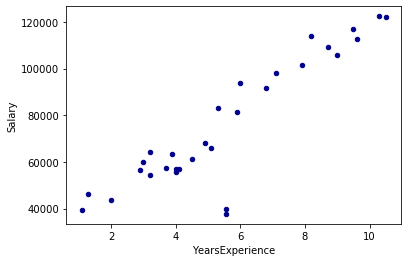

In [43]:
Salary_Data.plot.scatter(x='YearsExperience',y='Salary',c='DarkBlue')